# Campus Recruitment Data Set

# Description of Data

This data set consists of placement data of students from Jain University in Bangalor, India. It includes secondary and higher secondary school percentage and specialization. It also includes degree specialization, type and Work experience and salary offers to the placed students

This data was obtained from Kaggle, posted by user Ben Roshdan, a MBA student at Jain University. 

### 1. Import Packages
### 2. Load and Inspect Data 
### 3. Missing Values
### 4. EDA

#### Questions posed by Kaggle Post
- Which factor influenced a candidate in getting placed?
- Does percentage matters for one to get placed?
- Which degree specialization is much demanded by corporate? 

# 1. Importing Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.formula.api as smf
from scipy.stats import linregress

# 2. Load and Inspect Data

In [2]:
placement = pd.read_csv("/Users/alexanderhumpert/Desktop/Projects/Completed Projects/placement_data.csv")

In [3]:
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
placement.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

# 3. Missing Values

In [5]:
placement['salary'] = placement['salary'].fillna(0)

In [6]:
placement.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


Having loaded and inspected the data set for any null values we have found that the 67 entries for salary are null. By looking at the head of the dataset we can infer that NaN values are a result of graduates not finding employment. Therefore, we can simply replace the null values with the integer '0'. 


# 4. EDA
#### 4.1. Preliminary EDA: Categorical  & Numerical Data
#### 4.2. Which Factors Influencing Candidates in Getting Placed?
- Previous work experience > No previous work experience
- Marketing & Finance MBA specialisation > Marketing & HR MBA specialisation
- Commerce or Science Undergraduate Degree > 'Other' Degree

#### 4.3. Does percentage matters for one to get placed?
- Yes, but the effect is more strong for scores above a 60% cut-off for Secondary School, High School and Undergraduate. The 'percentage' effect is less strong for MBA and Employment Test scores. 

#### 4.4. Which degree specialization is much demanded by corporate? 
- The Degree specialisation demanded the most is Marketing & Finance over Marketing & HR. 

#### 4.5. Does Gender Matter?
- The best performing women get accepted all of the time whereas the best performing men only get accepted 71% of the time. However, of best performing men and women, the average salary of men is approx 120k lak higher

Now that our data is loaded and clean we can go ahead and start getting a better sense of its structure. First we will look at each column individually to get a sense of the numerical and categorical data (i.e. average test scores and proportions of students taking different degrees). After this, we can go ahead and try to answer the questions posed by the publisher of the Data Set. 

## 4.1. Structure of Data: Categorical and Numerical Data

#### Gender
Approximately 65% of graduates are men whereas 35% are women.

#### Degrees Taken
As students graduate from High School to College, students move from Science to Commerce degrees: where the total share of students taking Commerce increases from 52% to 67%, for Science the share decreases from 42% to 27%. The share of students taking Arts and Other degrees remains constant at 5% of students. 

#### MBA Specialisation
Marketing & Finance is a more popular specialisation than Marketing & HR, occupying 56% and 44% of total student enrollment, respectively.

#### Employment 
The graduate employment rate is 68%. 

#### Work Experience
66% of all graduates had previous work experience. 

#### Academic Scores
The distribution of Secondary School, High School, Undergraduate, and MBA scores are normally distributed. MBA scores have a median of 57% and the others a median of 60%.

#### Employment Test Scores
The employment test scores are not normally distributed, with a median of 60% and mean of 72%, suggesting the distribution is positively skewed. 

#### Salary 
Salaries are heavily positively skewed: salaries start at 200k Lak, the median is 265k and the highest salary is 940k.
Given that upper outliers include all salaries above 475k (median + 1.5IQR), only 6 graduates fit within this range. 

In [7]:
placement.gender.value_counts(normalize = True)

M    0.646512
F    0.353488
Name: gender, dtype: float64

In [8]:
placement.hsc_s.value_counts(normalize = True)

Commerce    0.525581
Science     0.423256
Arts        0.051163
Name: hsc_s, dtype: float64

In [9]:
placement.degree_t.value_counts(normalize = True)

Comm&Mgmt    0.674419
Sci&Tech     0.274419
Others       0.051163
Name: degree_t, dtype: float64

In [10]:
placement.specialisation.value_counts(normalize = True)

Mkt&Fin    0.55814
Mkt&HR     0.44186
Name: specialisation, dtype: float64

In [11]:
placement.status.value_counts(normalize = True)

Placed        0.688372
Not Placed    0.311628
Name: status, dtype: float64

In [12]:
placement.workex.value_counts(normalize = True)

No     0.655814
Yes    0.344186
Name: workex, dtype: float64

Text(0.5, 1.0, 'Graduate Employment')

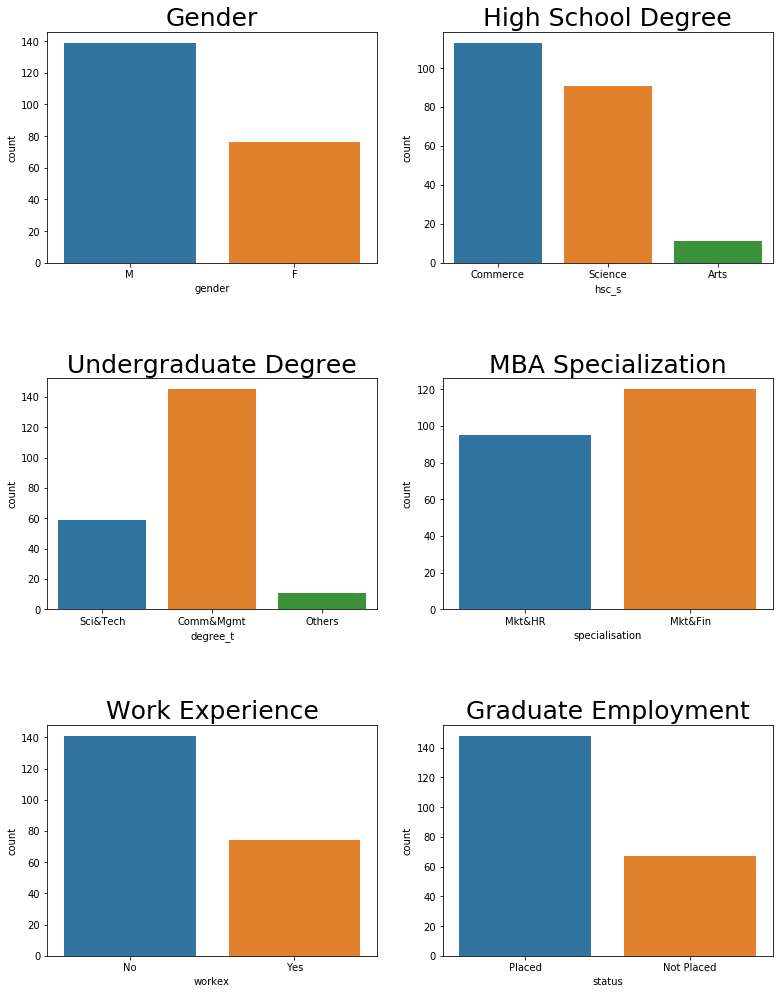

In [13]:
fig = plt.figure(figsize = (13, 17))
plt.subplots_adjust(hspace = 0.5)

ax1 = fig.add_subplot(3,2,1)
sns.countplot(data = placement, x = 'gender')
ax1.set_title('Gender', fontsize = 25)

ax2 = fig.add_subplot(3,2,2)
sns.countplot(data = placement, x = 'hsc_s')
ax2.set_title('High School Degree', fontsize = 25)

ax3 = fig.add_subplot(3,2,3)
sns.countplot(data = placement, x = 'degree_t')
ax3.set_title('Undergraduate Degree', fontsize = 25)

ax4 = fig.add_subplot(3,2,4)
sns.countplot(data = placement, x = 'specialisation')
ax4.set_title('MBA Specialization', fontsize = 25)

ax5 = fig.add_subplot(3,2,5)
sns.countplot(data = placement, x = 'workex')
ax5.set_title('Work Experience', fontsize = 25)

ax6 = fig.add_subplot(3,2,6)
sns.countplot(data = placement, x = 'status')
ax6.set_title('Graduate Employment', fontsize = 25)


Text(0.5, 1.0, 'Distribution of \n Placement Salaries')

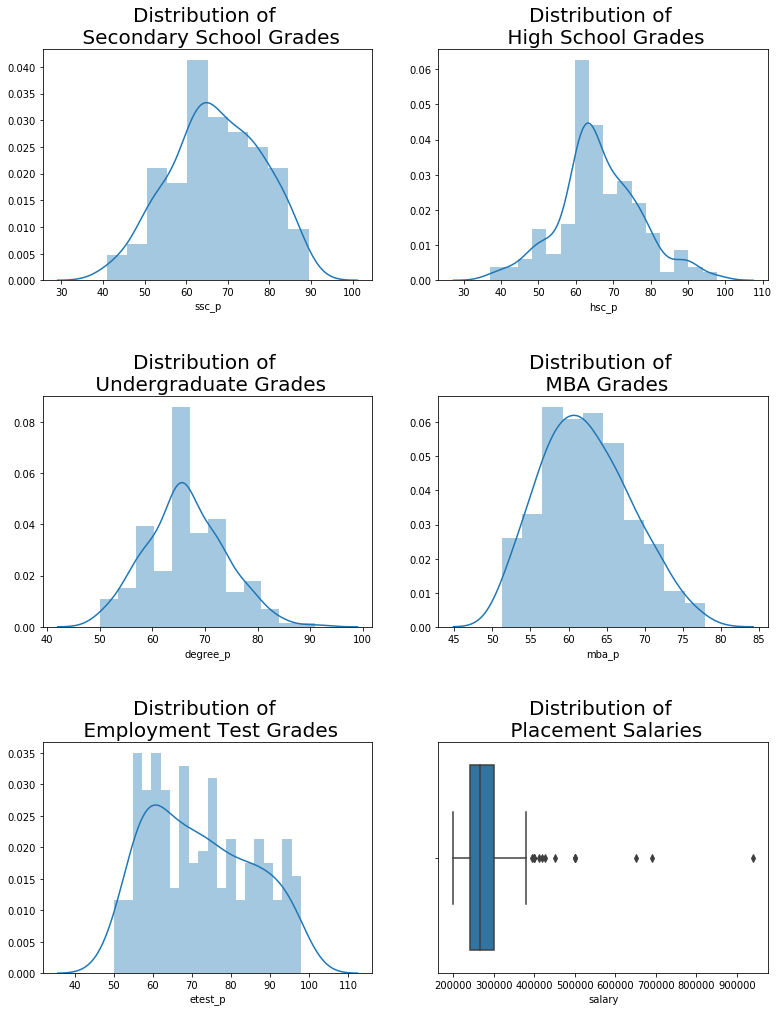

In [14]:
fig = plt.figure(figsize = (13, 17))
plt.subplots_adjust(hspace = 0.5)

ax1 = fig.add_subplot(3,2,1)
sns.distplot(placement['ssc_p'])
ax1.set_title('Distribution of \n Secondary School Grades', fontsize = 20)

ax2 = fig.add_subplot(3,2,2)
sns.distplot(placement['hsc_p'])
ax2.set_title('Distribution of \n High School Grades', fontsize = 20)

ax3 = fig.add_subplot(3,2,3)
sns.distplot(placement['degree_p'])
ax3.set_title('Distribution of \n Undergraduate Grades', fontsize = 20)

ax4 = fig.add_subplot(3,2,4)
sns.distplot(placement['mba_p'])
ax4.set_title('Distribution of \n MBA Grades', fontsize = 20)

ax5 = fig.add_subplot(3,2,5)
sns.distplot(placement['etest_p'], bins = 20)
ax5.set_title('Distribution of \n Employment Test Grades', fontsize = 20)

ax6 = fig.add_subplot(3,2,6)
salary = placement[placement['salary'] != 0.0]
sns.boxplot(data = placement, x = salary['salary'])
ax6.set_title('Distribution of \n Placement Salaries', fontsize = 20)

In [15]:
placement[['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p']].describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


In [16]:
salary = placement[placement['salary'] != 0.0]
salary['salary'].describe()

count       148.000000
mean     288655.405405
std       93457.452420
min      200000.000000
25%      240000.000000
50%      265000.000000
75%      300000.000000
max      940000.000000
Name: salary, dtype: float64

In [17]:
outliers = placement[placement['salary'] > 475000]
outliers.count()

sl_no             6
gender            6
ssc_p             6
ssc_b             6
hsc_p             6
hsc_b             6
hsc_s             6
degree_p          6
degree_t          6
workex            6
etest_p           6
specialisation    6
mba_p             6
status            6
salary            6
dtype: int64

# 4.2. Factors Influencing Candidate in Getting Placed

### Categorical Variables
By comparing categorical variables of a student relative to their placement, we can determine wether certain factors are more helpful in order for students to find employment after graduation. From the first set of visualisations it is obvious the proportion of students who have previous work experience as opposed to no previous work experience, a marketing & finance specilisation as opposed to a marketing & HR specialisation, are female rather than male, and did not take a degree besides Commerce or Science in High School, are more likely to get a placement at a firm. 

### Numerical Variables
With regards to numerical variables, the vertical box plots allow us to see score and gender differences between students who were placed and those who were not. A number of possible inferences can be made by each graph. 
First, females tend to have median grades for Secondary, High School, Undergrad and MBA degrees regardless of placement. 
Second, for both males and females, a clear cut off point can be identified for those who find placement vs those who don't, with regards to their Secondary School, High School and Undergraduate scores. For men it floats between 60 and 65% and for women between 64% and 70%. Instead, for MBA and Eemployment Test scores, more variability is allowed. The differing placement cut-offs for earlier education suggest that either women must meet higher standards, or that scores are graded on a curve by gender. 

Text(0.5, 1.0, 'Placement Relative to \n Gender')

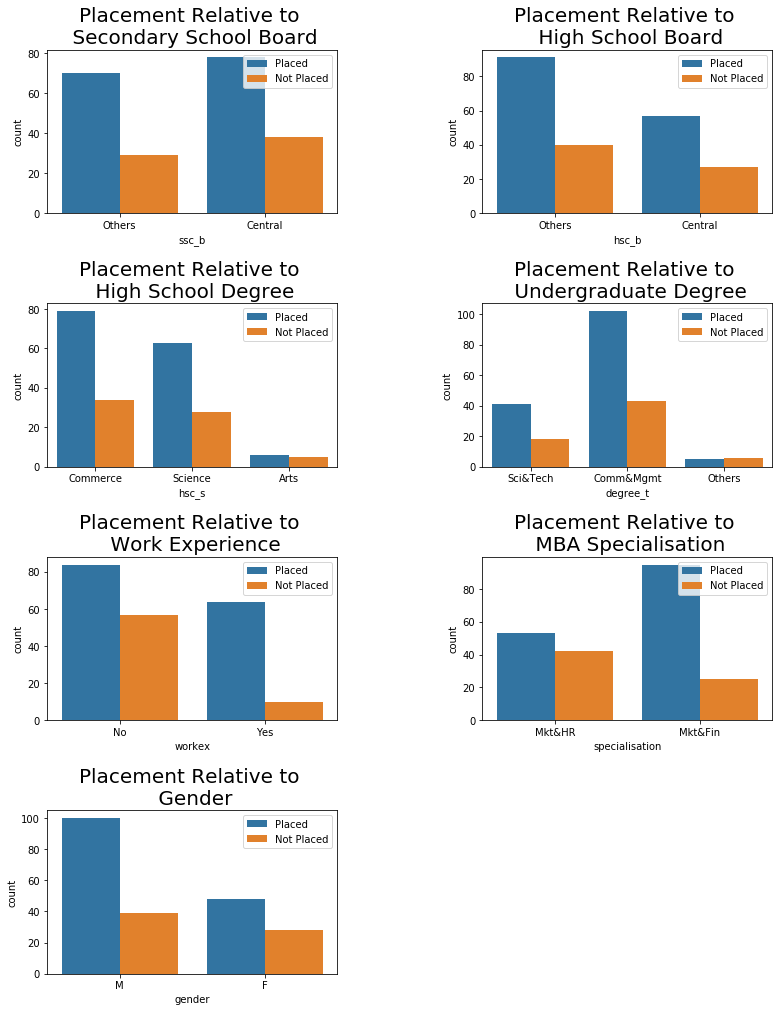

In [18]:
fig = plt.figure(figsize = (13,17))
plt.subplots_adjust(hspace = 0.55, wspace = 0.5)

ax1 = fig.add_subplot(4,2,1)
sns.countplot(data = placement, x = 'ssc_b', hue = 'status')
ax1.legend(loc = 'upper right')
ax1.set_title('Placement Relative to \n Secondary School Board', fontsize = 20)
    
    
ax2 = fig.add_subplot(4,2,2)
sns.countplot(data = placement, x = 'hsc_b', hue = 'status')
ax2.legend(loc = 'upper right')
ax2.set_title('Placement Relative to \n High School Board', fontsize = 20)

ax3 = fig.add_subplot(4,2,3)
sns.countplot(data = placement, x = 'hsc_s', hue = 'status')
ax3.legend(loc = 'upper right')
ax3.set_title('Placement Relative to \n High School Degree', fontsize = 20)

ax4 = fig.add_subplot(4,2,4)
sns.countplot(data = placement, x = 'degree_t', hue = 'status')
ax4.legend(loc = 'upper right')
ax4.set_title('Placement Relative to \n Undergraduate Degree', fontsize = 20)

ax5 = fig.add_subplot(4,2,5)
sns.countplot(data = placement, x = 'workex', hue = 'status')
ax5.legend(loc = 'upper right')
ax5.set_title('Placement Relative to \n Work Experience', fontsize = 20)

ax6 = fig.add_subplot(4,2,6)
sns.countplot(data = placement, x = 'specialisation', hue = 'status')
ax6.legend(loc = 'upper right')
ax6.set_title('Placement Relative to \n MBA Specialisation', fontsize = 20)

ax7 = fig.add_subplot(4,2,7)
sns.countplot(data = placement, x = 'gender', hue = 'status')
ax7.legend(loc = 'upper right')
ax7.set_title('Placement Relative to \n Gender', fontsize = 20, )


## 4.4. Does Percentage Matter

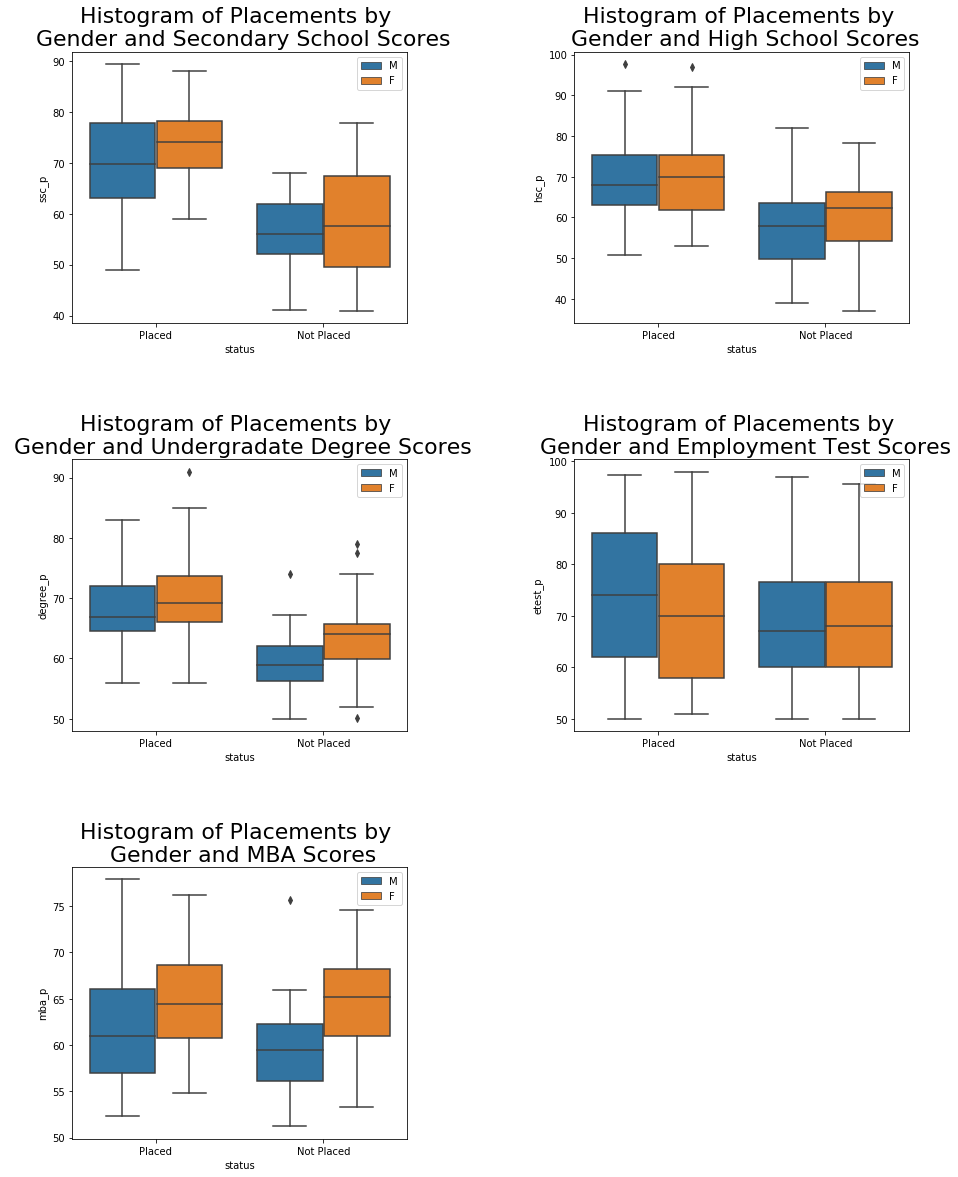

In [19]:
fig = plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

ax1 = fig.add_subplot(3,2,1)
sns.boxplot(data = placement, x = 'status', y = 'ssc_p', hue = 'gender')
ax1.set_title('Histogram of Placements by \n Gender and Secondary School Scores', fontsize = 22)
ax1.legend(loc = 'upper right')

ax2 = fig.add_subplot(3,2,2)
sns.boxplot(data = placement, x = 'status', y = 'hsc_p', hue = 'gender')
ax2.set_title('Histogram of Placements by \n Gender and High School Scores', fontsize = 22)
ax2.legend(loc = 'upper right')

ax3 = fig.add_subplot(3,2,3)
sns.boxplot(data = placement, x = 'status', y = 'degree_p', hue = 'gender')
ax3.set_title('Histogram of Placements by \n Gender and Undergradate Degree Scores', fontsize = 22)
ax3.legend(loc = 'upper right')

ax4 = fig.add_subplot(3,2,4)
sns.boxplot(data = placement, x = 'status', y = 'etest_p', hue = 'gender')
ax4.set_title('Histogram of Placements by \n Gender and Employment Test Scores', fontsize = 22)
ax4.legend(loc = 'upper right')

ax5 = fig.add_subplot(3,2,5)
sns.boxplot(data = placement, x = 'status', y = 'mba_p', hue = 'gender')
ax5.set_title('Histogram of Placements by \n Gender and MBA Scores', fontsize = 22)
ax5.legend(loc = 'upper right')

### 4.5. Does Gender Matter?
- The best performing women get accepted all of the time whereas the best performing men only get accepted 71% of the time. However, of best performing men and women, the average salary of men is approx 120k lak higher

In [20]:
placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          215 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [21]:
#Best: male (71%), female (100%)
best_man = placement[(placement.gender == 'M') &
                      (placement.ssc_b == 'Others') &
                      (placement.ssc_b == 'Others') &
                      (placement.hsc_s == 'Science') &
                      (placement.degree_t == 'Sci&Tech') &
                      (placement.workex == 'Yes') &
                      (placement.specialisation == 'Mkt&Fin')]
best_man.status.value_counts(normalize = True)

best_woman = placement[(placement.gender == 'F') &
                      (placement.ssc_b == 'Others') &
                      (placement.ssc_b == 'Others') &
                      (placement.hsc_s == 'Science') &
                      (placement.degree_t == 'Sci&Tech') &
                      (placement.workex == 'Yes') &
                      (placement.specialisation == 'Mkt&Fin')]
best_woman.status.value_counts(normalize = True)

Placed    1.0
Name: status, dtype: float64

In [22]:
#Best Mean Salary: best man (378,000), best woman (253,3333)
best_woman_placement_salary = best_woman['salary']
best_woman_placement_salary.mean()

best_man_placement = best_man[placement.status == 'Placed']
best_man_placement_salary = best_man_placement['salary']
best_man_placement_salary.mean()


/Users/alexanderhumpert/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


378000.0

In [23]:
#Gender: male (72%), female (63%)
male = placement[placement.gender == 'M']
male.status.value_counts(normalize = True)

female = placement[placement.gender == 'F']
female.status.value_counts(normalize = True)

#lower school board:  central (67%), other (70%)
central = placement[placement.ssc_b == 'Central']
central.status.value_counts(normalize = True)

other = placement[placement.ssc_b == 'Others']
other.status.value_counts(normalize = True)

#Upper school board:  central (67%), other (70%)
central = placement[placement.ssc_b == 'Central']
central.status.value_counts(normalize = True)

other = placement[placement.ssc_b == 'Others']
other.status.value_counts(normalize = True)

#Upper School Degree: commerce & science (70%), arts (54%)
arts = placement[placement.hsc_s == 'Arts']
arts.status.value_counts(normalize = True)

science = placement[placement.hsc_s == 'Science']
science.status.value_counts(normalize = True)

commerce = placement[placement.hsc_s == 'Commerce']
commerce.status.value_counts(normalize = True)

#Ugrad Degree: comms & sci (70%), others (54%)
sci = placement[placement.degree_t == 'Sci&Tech']
sci.status.value_counts(normalize = True)

comms = placement[placement.degree_t == 'Comm&Mgmt']
comms.status.value_counts(normalize = True)

others = placement[placement.degree_t == 'Others']
others.status.value_counts(normalize = True)

#Work Experience: Yes (86%), No (60%)
yes = placement[placement.workex == 'Yes']
yes.status.value_counts(normalize = True)

No = placement[placement.workex == 'No']
No.status.value_counts(normalize = True)

#MBA degree: mkt_Fin (79%), mkt_hr: (56%)
mkt_hr = placement[placement.specialisation == 'Mkt&HR']
mkt_hr.status.value_counts(normalize = True)

mkt_fin = placement[placement.specialisation == 'Mkt&Fin']
mkt_fin.status.value_counts(normalize = True)



Placed        0.791667
Not Placed    0.208333
Name: status, dtype: float64

# Other Statistical Tests

### 1. Correlation Between Percentages

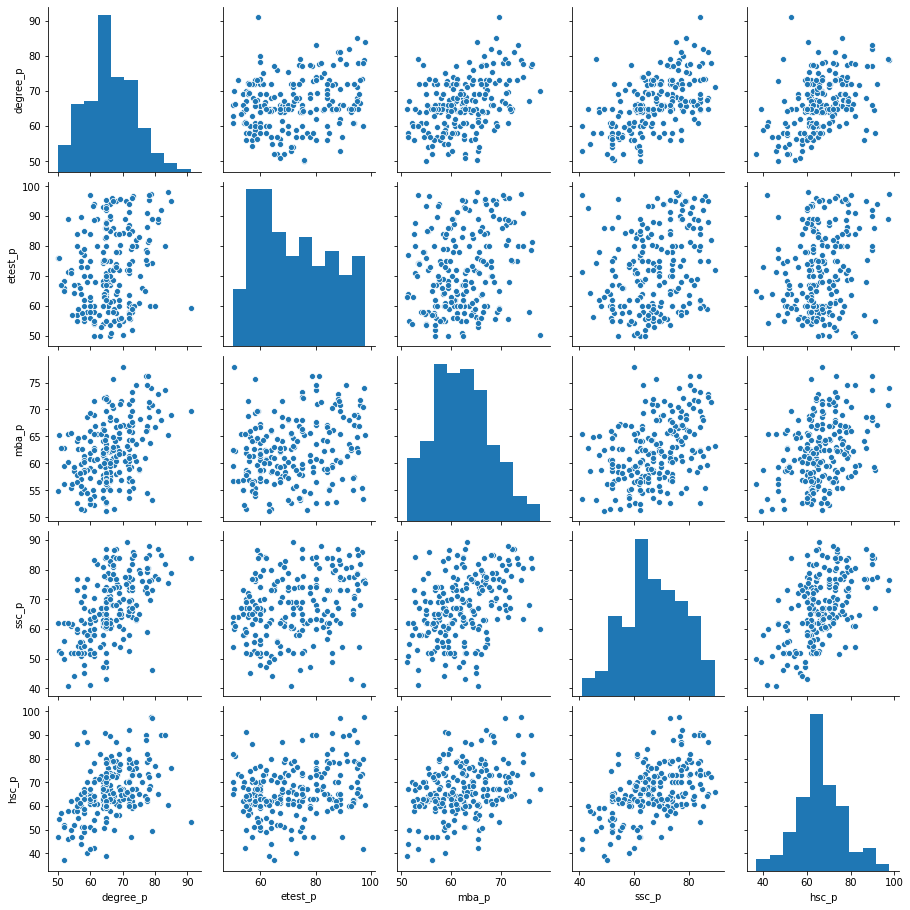

In [24]:
sns.pairplot(data = placement, vars = ["degree_p" , "etest_p" , "mba_p" , "ssc_p" , "hsc_p"])
plt.show()

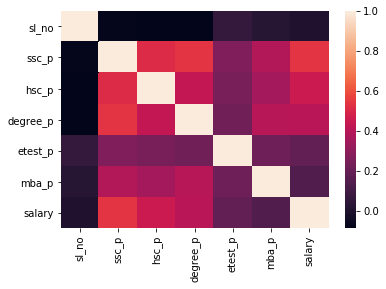

In [25]:
sns.heatmap(placement.corr())

In [26]:
placement.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

### 2. Relationships

Text(0, 0.5, 'Salary')

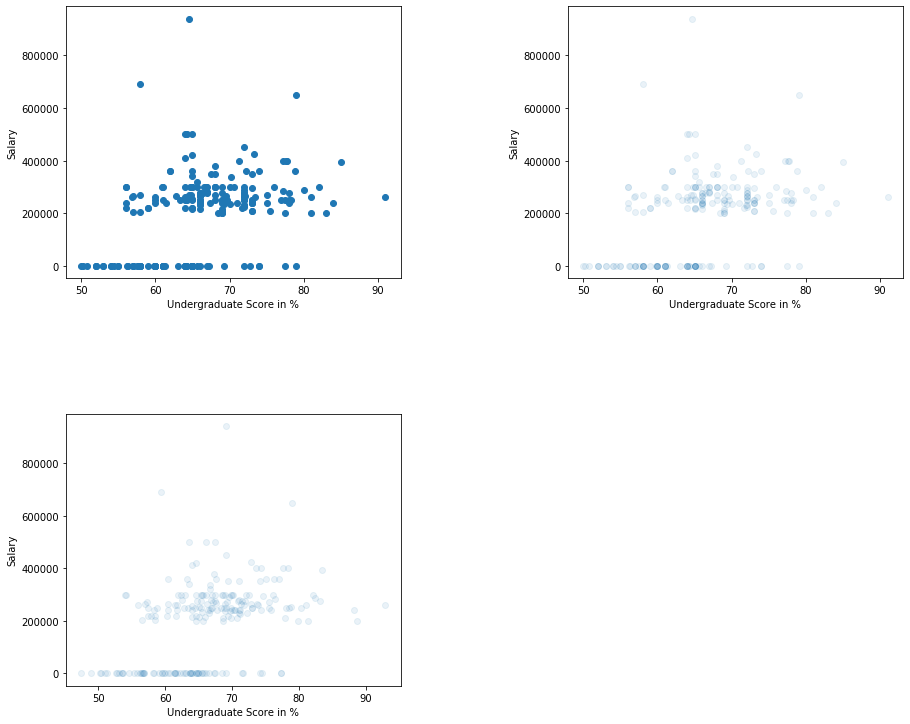

In [27]:
fig = plt.figure(figsize = (15,20))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

ax1 = fig.add_subplot(3,2,1)
ugrad_score = placement['degree_p']
salary = placement['salary']
ax1.plot(ugrad_score, salary, 'o')
ax1.set_xlabel('Undergraduate Score in %')
ax1.set_ylabel('Salary')

ax2 = fig.add_subplot(3,2,2)
ugrad_score = placement['degree_p']
salary = placement['salary']
ax2.plot(ugrad_score, salary, 'o', alpha = 0.09)
ax2.set_xlabel('Undergraduate Score in %')
ax2.set_ylabel('Salary')

ax3 = fig.add_subplot(3,2,3)
ugrad_score = placement['degree_p']
salary = placement['salary']

ugrad_score_jitter = ugrad_score + np.random.normal(0, 2, size = len(placement))
salary_jitter = salary + np.random.normal(0,2, size = len(placement))
ax3.plot(ugrad_score_jitter, salary_jitter, 'o', alpha = 0.09)
ax3.set_xlabel('Undergraduate Score in %')
ax3.set_ylabel('Salary')


### Correlation
- In stats: Pearson's Correlation Coefficient, Number betweeen -1 and 1 that quantifies the strenght of a linear relationship between variables. 


In [28]:
subset = placement[['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p', 'salary']]
subset.corr()

,ssc_p,hsc_p,degree_p,mba_p,etest_p,salary
ssc_p,1.000000,0.511472,0.538404,0.388478,0.261993,0.538090
hsc_p,0.511472,1.000000,0.434206,0.354823,0.245113,0.452569
degree_p,0.538404,0.434206,1.000000,0.402364,0.224470,0.408371
mba_p,0.388478,0.354823,0.402364,1.000000,0.218055,0.139823
etest_p,0.261993,0.245113,0.224470,0.218055,1.000000,0.186988
salary,0.538090,0.452569,0.408371,0.139823,0.186988,1.000000


### Simple Regression
Correlation v slope
Slope also only measures strength of linear relationship.
- Regression is NOT symmetric, Regression of A onto B ≠ Regression of B onto A. Former, A is known and B is random, latter, B is known and A is random. Treating data in different ways influences results you get. 
- Does not tell you anything about causation. 

In [29]:
new_placement = placement[placement['salary'] != 0.0]

In [30]:
xs = placement['degree_p']
ys = placement['salary']
res = linregress(xs, ys)

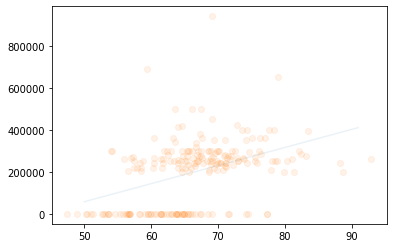

In [31]:
fx = np.array([xs.min(), xs.max()])
fy = res.intercept + res.slope * fx
plt.plot(fx, fy, '-', 
         ugrad_score_jitter, salary_jitter, 
         'o', alpha = 0.09)

### Simple Regression

In [32]:
results = smf.ols('degree_p ~ salary', data = new_placement).fit()
results.params
#Variable on left in ols() is is predictED and variable on right is
#predictOR

Intercept    69.128528
salary       -0.000001
dtype: float64

### Multiple Regression
- Becasue Simple Regression does not allow you to run non-linear relationships, one can add a quadratic term to the relationship between a pair of non-linear predictor and predicted values. 
- As there is no non-linear relationship between two numerical variables in this dataset, I cannot illustrate this. 
- Vizualizing the model of a multiple regression allows you to compare predictors to raw data and distinguish the predictive effect of different variables on the predictED variable.
